In [873]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

In [874]:
def get_number_str(number):
    string = str(number)

    if len(string) == 1:
        return '00' + string
    elif len(string) == 2:
        return '0' + string
    
    return string

In [875]:
import os

def get_sub_path(path, sub_folder_name):
    # find all folders in path folder
    sub_folders = [f.path for f in os.scandir(path) if f.is_dir()]

    # get folder that contains NA-Preop and no spaces in name
    for folder in sub_folders:
        if sub_folder_name in folder and ' ' not in folder:
            return folder

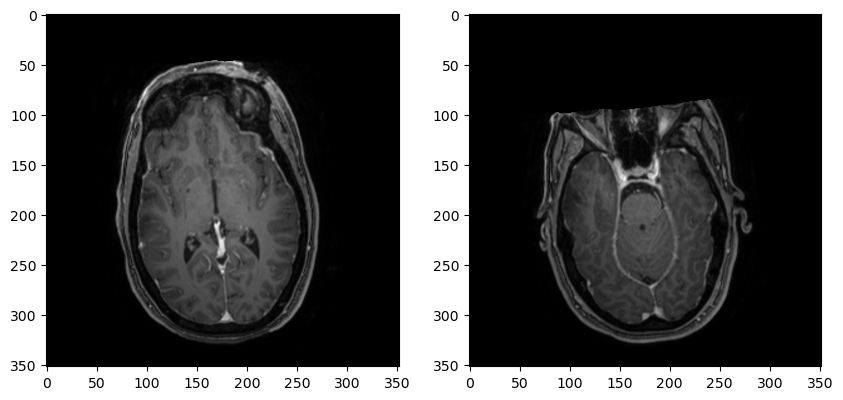

In [876]:
import tensorflow_io as tfio

# astrocytoma 10
# glioblastoma 11
# oligodendroglioma 10

patient_id = 'ReMIND-109'
category = 'Oligodendroglioma'
lower_limit = get_number_str(145)
upper_limit = get_number_str(170)

folder = get_sub_path(get_sub_path(f'images/manifest-1695134609823/ReMIND/{patient_id}', 'NA-Preop'), '3DAXT1postcontrast')

image_bytes_lower = tf.io.read_file(f'{folder}/1-{lower_limit}.dcm')
image_bytes_upper = tf.io.read_file(f'{folder}/1-{upper_limit}.dcm')

image_lower_limit = tfio.image.decode_dicom_image(image_bytes_lower, dtype=tf.uint16)
image_upper_limit = tfio.image.decode_dicom_image(image_bytes_upper, dtype=tf.uint16)

fig, axes = plt.subplots(1,2, figsize=(10,10))
axes[0].imshow(np.squeeze(image_lower_limit.numpy()), cmap='gray')
## save axes[0] without axis and title
axes[1].imshow(np.squeeze(image_upper_limit.numpy()), cmap='gray')

In [877]:
for i in range(int(lower_limit), int(upper_limit)):
    number_str = get_number_str(i)

    image_bytes = tf.io.read_file(f'{folder}/1-{number_str}.dcm')
    image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint16)

    fig, axes = plt.subplots(1,1, figsize=(10,10))
    axes.imshow(np.squeeze(image.numpy()), cmap='gray')
    axes.axis('off')

    plt.savefig(f'data/{category}/{patient_id}-{number_str}.png', bbox_inches='tight', pad_inches=0)
    plt.close()



